### Assignment 6

#### INSTRUCTIONS

For all the questions in this assignment, students are required to submit a screenshot of their terminal/ command prompt and attach any files genreated in the process (output files, spider files, and scrapy project files)

All the questions have to be executed using the commands provided in your command prompt (Windows) or terminal (UNIX/Linux/Mac).

Questions 1-4 have to be done using scrapy shell
Question 5 has to to executed using scrapy runspider spider_file.py -o outputfile_name -t file_extension

### Question 1

From the given Stackoverflow page, extract all the questions listed on the page.

url = https://stackoverflow.com/questions
Note: Question 1 & 2 require the same page to be loaded. It is better you do not close the shell


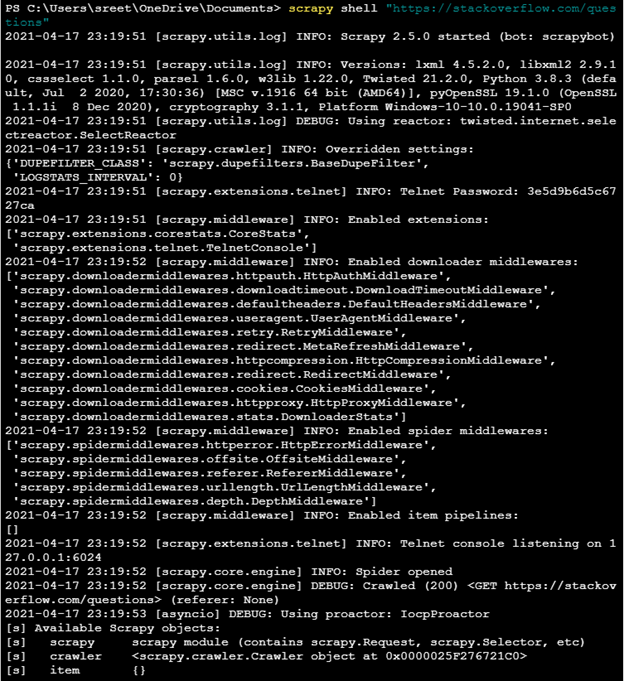

### Question 2

Request the page in Question 1 (or use the same shell) and fetch the hyperlink of each question listed on the page.

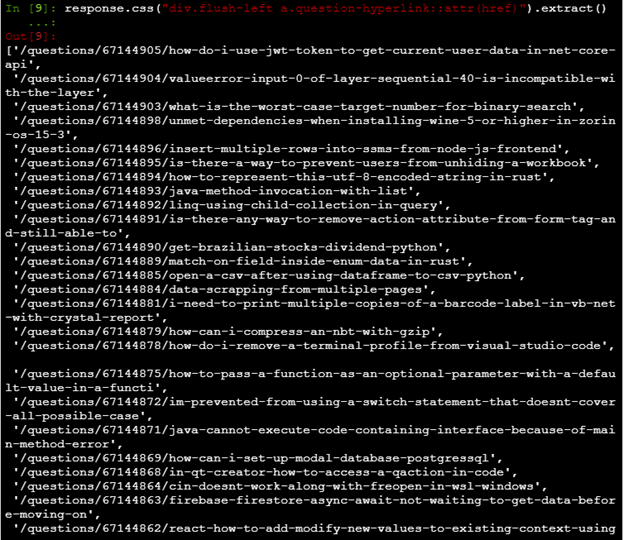

### Question 3

This is question is similar to the previous questions

Go to the given Stackoverflow (jobs) page and extract the titles/role of all the jobs listed on the page.

url = https://stackoverflow.com/jobs?med=site-ui&ref=jobs-tab
Note: Question 3 & 4 require the same page to be loaded. It is better you do not close the shell

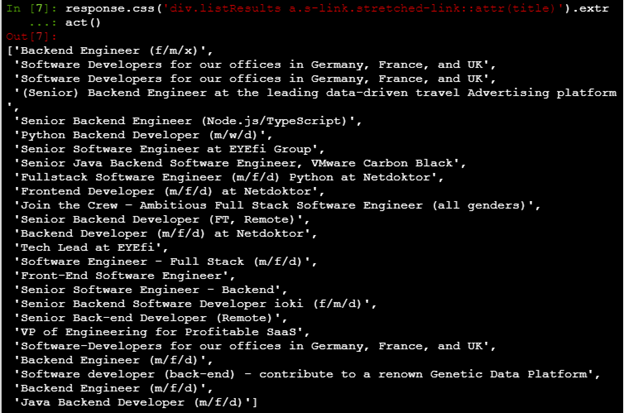

### Question 4

Request the page in Question 3 (or use the same shell), fetch the location of all the jobs posted on the given page.

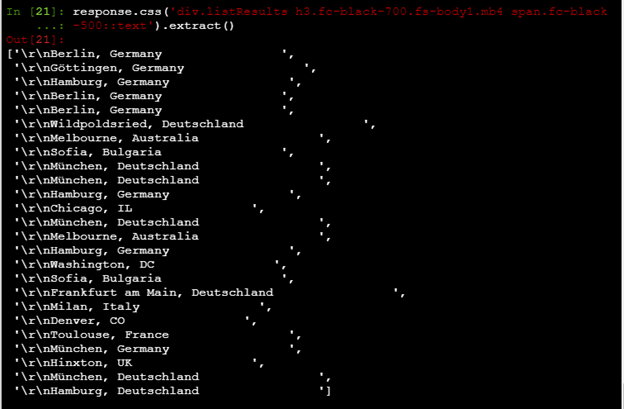

### Question 5

Write a spider to fetch details of the jobs listed on Stackoverflow jobs page. The details to be fetched are: Job title, Company, Location of the job. All the results must be written to a CSV file name jobs.csv.

The link to Stackoverflow jobs page is: https://stackoverflow.com/jobs?med=site-ui&ref=jobs-tab

In [11]:
import scrapy

class DocSectionItem(scrapy.Item):
    # section_name attribute is of type scrapy.Field()
    section_title = scrapy.Field()
    section_company = scrapy.Field()
    section_location = scrapy.Field()

class StackOverflowSpider(scrapy.Spider):
    name = 'jobs'
    start_urls = ['https://stackoverflow.com/jobs?med=site-ui&ref=jobs-tab']

    def parse(self, response):
        for a_el in response.xpath('//div[@class="listResults"]'):
            section = DocSectionItem()
            section['section_title'] = a_el.xpath('.//a[@class="s-link stretched-link"]/@title').extract()
            section['section_company'] = a_el.xpath('.//h3[@class="fc-black-700 fs-body1 mb4"]/span[1]/text()').extract()
            section['section_location'] = a_el.xpath('.//h3[@class="fc-black-700 fs-body1 mb4"]/span[2]/text()').extract()

#             print(type(section))
            yield section


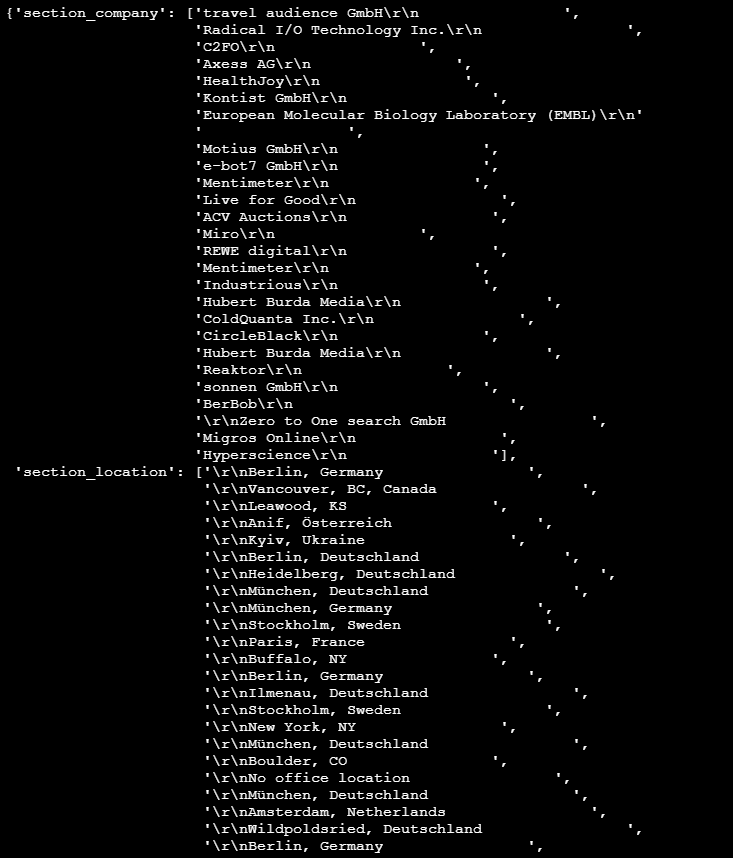

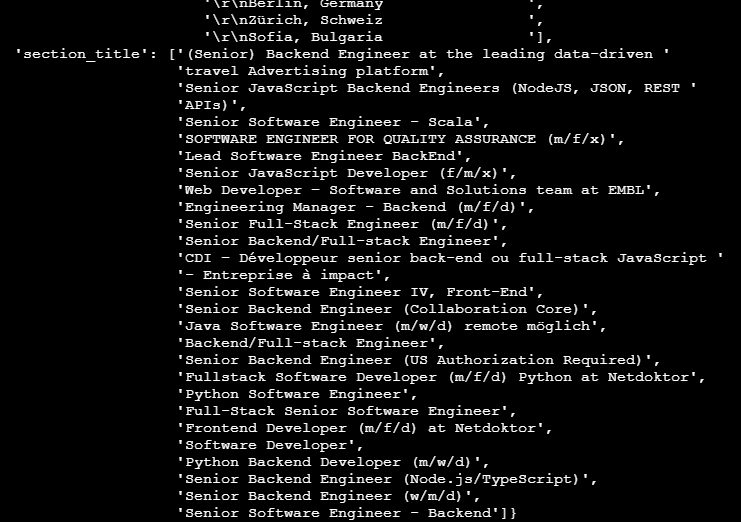

In [206]:
import csv

import pandas as pd
column_names = ["Company", "Location", "Title"]
df = pd.read_csv("C:/Users/sreet/OneDrive/Documents/jobs.csv", skiprows=1, names=column_names)
# print(df)

rows = df.apply(lambda x: x.tolist(), axis=1)
print(rows)
for row in rows:
    company = row[0]
    location = row[1]
    title = row[2]

company = [x.strip() for x in company.split(',')]
location = [x.strip() for x in location.split(',')]
title = [x.strip() for x in title.split(',')]

# print(company.replace('\r', '').replace('\t', '').replace('\n', '').rstrip())
# print(company.rstrip().replace('\r', '').replace('\t', '').replace('\n', ''))

# df1 = df.replace('\r', '').replace('\t', '').replace('\n', '')
# print(df1)

jobinfo = zip(company, location, title)

with open('list.csv', 'w') as f:
    writer = csv.writer(f)
    for row in jobinfo:
        writer.writerow(column_names)
        writer.writerow(row)


0    [Hyperscience\r\n                ,HealthJoy\r\...
dtype: object


### Question 6

Congrats on reaching this far! There is just one more question left. This question is an extension to the previous question.

In Question 5, you have stored all the jobs listed on the first page. Now, add page following capability to the spider you have just written. There are approximately 108 pages of job listing on the website: https://stackoverflow.com/jobs?med=site-ui&ref=jobs-tab.

Crawl all the pages and store all the jobs postings to a CSV file.

Hint: Just follow the link referred by next button at the bottom of each page. (See Following section in Lecture 20)

Tip: Write the URL following code before processing the job data in parse(). This makes the program run faster. There is no need to write a new parse method as the new page we request has the same structure as the current page. We can use the same parse() as call-back function.

In [ ]:
# had the same xpath issue with this question as I did the last assignment
# so I did what I could because I tried the 'Copy xpath' for every possible 
# element related to the button for the next page
# I had some convo with Keith on slack as well, but that didn't help to figure
# out why the xpaths I was getting were different from Keith's

import scrapy

class DocSectionItem(scrapy.Item):
    # section_name attribute is of type scrapy.Field()
    section_title = scrapy.Field()
    section_company = scrapy.Field()
    section_location = scrapy.Field()

class StackOverflowSpider(scrapy.Spider):
    name = 'alljobs'
    start_urls = ['https://stackoverflow.com/jobs?med=site-ui&ref=jobs-tab']

    def parse(self, response):
        
        for follow_href in response.xpath('//div[@class="py32 px16"]//div[@class="s-pagination"]//a["s-pagination--item"]/@href'):
            follow_url = response.urljoin(follow_href.extract())
            
            yield scrapy.Request(follow_url, callback=self.parse_page_title)
    def parse_page_title(self, response):
        for a_el in response.xpath('//div[@class="listResults"]'):
            section = DocSectionItem()
            section['section_title'] = a_el.xpath('.//a[@class="s-link stretched-link"]/@title').extract()
            section['section_company'] = a_el.xpath('.//h3[@class="fc-black-700 fs-body1 mb4"]/span[1]/text()').extract()
            section['section_location'] = a_el.xpath('.//h3[@class="fc-black-700 fs-body1 mb4"]/span[2]/text()').extract()

#             print(type(section))
            yield section


In [ ]:
import csv

import pandas as pd
column_names = ["Company", "Location", "Title"]
df = pd.read_csv("C:/Users/sreet/OneDrive/Documents/jobs.csv", skiprows=1, names=column_names)
# print(df)

rows = df.apply(lambda x: x.tolist(), axis=1)
print(rows)
for row in rows:
    company = row[0]
    location = row[1]
    title = row[2]

company = [x.strip() for x in company.split(',')]
location = [x.strip() for x in location.split(',')]
title = [x.strip() for x in title.split(',')]

# print(company.replace('\r', '').replace('\t', '').replace('\n', '').rstrip())
# print(company.rstrip().replace('\r', '').replace('\t', '').replace('\n', ''))

# df1 = df.replace('\r', '').replace('\t', '').replace('\n', '')
# print(df1)

jobinfo = zip(company, location, title)

with open('alljobs.csv', 'w') as f:
    writer = csv.writer(f)
    for row in jobinfo:
        writer.writerow(column_names)
        writer.writerow(row)